In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [4]:
columns=["strain11","strain22","strain12","stress11","stress22","stress12","total_centrosymmetry","max_centrosymmetry"]

### Read from all the data files and store in a dataframe

In [5]:
path = "../data/lammps-output/" # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename,skiprows=1,delimiter=" ",names=columns)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
display(frame)

,strain11,strain22,strain12,stress11,stress22,stress12,total_centrosymmetry,max_centrosymmetry
0,-5.000000e-05,-0.00005,0.000000,-0.013583,-0.022138,0.000618,5257.036892,3.733919
1,-1.000000e-04,-0.00010,0.000000,-0.040113,-0.008942,-0.005942,5344.397247,3.865128
2,-1.500000e-04,-0.00015,0.000000,-0.033780,-0.031261,-0.008021,5376.989010,3.890606
3,-2.000000e-04,-0.00020,0.000000,-0.037354,-0.059623,0.004804,5315.367401,4.256244
4,-2.500000e-04,-0.00025,0.000000,-0.053246,-0.049469,-0.007299,5301.982347,4.893839
...,...,...,...,...,...,...,...,...
169995,8.740412e-16,-0.19980,-0.199078,-25.823458,-28.607663,-2.075425,12020.765604,10.648768
169996,8.740412e-16,-0.19985,-0.199127,-25.765683,-28.580675,-2.109421,11883.454957,10.925446
169997,8.740412e-16,-0.19990,-0.199177,-25.709577,-28.600624,-2.110126,11844.958527,10.555822
169998,8.740412e-16,-0.19995,-0.199227,-25.744227,-28.640716,-2.143415,11959.143603,11.241321


### Below are all 26 simulation output files

In [6]:
for ind,file in enumerate(all_files):
    print(ind,file)

0 ./data_generation_script/data/data_collection/Al_bicomp_s0.def.txt
1 ./data_generation_script/data/data_collection/Al_bicomp_s20.def.txt
2 ./data_generation_script/data/data_collection/Al_bicomp_sn20.def.txt
3 ./data_generation_script/data/data_collection/Al_bitencomp_s0.def.txt
4 ./data_generation_script/data/data_collection/Al_bitencomp_s20.def.txt
5 ./data_generation_script/data/data_collection/Al_bitencomp_sn20.def.txt
6 ./data_generation_script/data/data_collection/Al_biten_s0.def.txt
7 ./data_generation_script/data/data_collection/Al_biten_s20.def.txt
8 ./data_generation_script/data/data_collection/Al_biten_sn20.def.txt
9 ./data_generation_script/data/data_collection/Al_s20.def.txt
10 ./data_generation_script/data/data_collection/Al_sn20.def.txt
11 ./data_generation_script/data/data_collection/Al_unicomp_s0.def.txt
12 ./data_generation_script/data/data_collection/Al_unicomp_s20.def.txt
13 ./data_generation_script/data/data_collection/Al_unicomp_sn20.def.txt
14 ./data_generation

### Analyse and Visualize the results of Each sumulation run

Each dataframe can be called by its indexes assigned above

In [95]:
display(li[17][:10])

,strain11,strain22,strain12,stress11,stress22,stress12,total_centrosymmetry,max_centrosymmetry
0,-0.00005,0.00005,0,-0.007137,-0.011012,0.000615,5258.048551,3.735365
1,-0.00010,0.00010,0,-0.027098,0.013421,-0.005931,5346.274697,3.865391
2,-0.00015,0.00015,0,-0.014199,0.002380,-0.007989,5380.019124,3.899357
3,-0.00020,0.00020,0,-0.011187,-0.014651,0.004782,5318.885210,4.265620
4,-0.00025,0.00025,0,-0.020465,0.006752,-0.007194,5306.228035,4.881496
5,-0.00030,0.00030,0,-0.034153,-0.001141,0.003982,5381.090120,4.439184
6,-0.00035,0.00035,0,-0.031021,0.017285,-0.004314,5303.145691,3.993720
7,-0.00040,0.00040,0,-0.043651,0.025830,-0.011920,5207.691288,5.881351
8,-0.00045,0.00045,0,-0.040161,0.028540,-0.011960,5326.805952,5.119017
9,-0.00050,0.00050,0,-0.041991,0.032688,-0.004695,5324.985692,3.393648


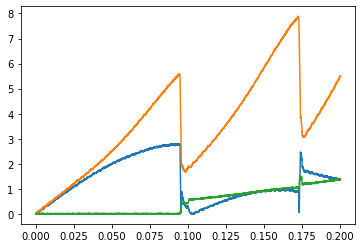

In [5]:
plt.plot(abs(li[3]["strain11"]),abs(li[3]["stress11"]))
plt.plot(abs(li[3]["strain11"]),abs(li[3]["stress22"]))
plt.plot(abs(li[3]["strain11"]),abs(li[3]["stress12"]))
#plt.plot(abs(li[6]["strain12"]),abs(li[6]["total_centrosymmetry"])/1000)

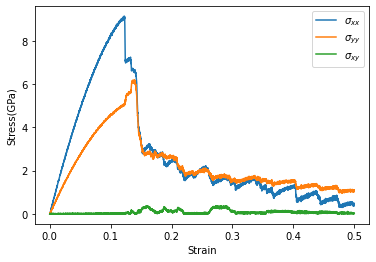

In [10]:
plt.plot(abs(li[14]["strain11"]),abs(li[14]["stress11"]),label=r'$\sigma_{xx}$')
plt.plot(abs(li[14]["strain11"]),abs(li[14]["stress22"]),label=r'$\sigma_{yy}$')
plt.plot(abs(li[14]["strain11"]),abs(li[14]["stress12"]),label=r'$\sigma_{xy}$')
plt.xlabel("Strain")
plt.ylabel("Stress(GPa)")
plt.legend()
plt.savefig("uniaxial.png")
#plt.plot(abs(li[2]["strain11"]),abs(li[3]["total_centrosymmetry"])/1000)

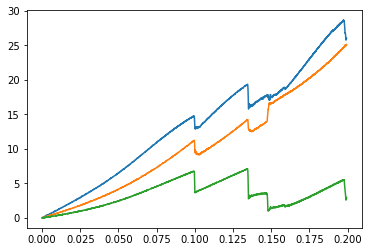

In [10]:
plt.plot(abs(li[13]["strain12"]),abs(li[13]["stress11"]))
plt.plot(abs(li[13]["strain12"]),abs(li[13]["stress22"]))
plt.plot(abs(li[13]["strain12"]),abs(li[13]["stress12"]))
#plt.plot(abs(li[2]["strain11"]),abs(li[2]["total_centrosymmetry"]/1000))

### Label Defect Modes

Defect Mode column is added  to the dataframe based on atomistic observation through OVITO

Defect free mode:  1 \
Dislocation Mode:  0 \
Void Mode       : -1 

#### Uniaxial Tension

No Shear

In [13]:
li[14]["defect_mode"]=0 # x-axis tension
li[14]["defect_mode"].iloc[0:980]=1
li[14]["defect_mode"].iloc[1118:]=-1

In [11]:
li[20]["defect_mode"]=0 # y-axis tension
li[20]["defect_mode"].iloc[0:980]=1
li[20]["defect_mode"].iloc[1118:]=-1

Positive Shear

In [12]:
li[15]["defect_mode"]=0 # x-axis tension
li[15]["defect_mode"].iloc[0:1087]=1
li[15]["defect_mode"].iloc[1428:]=-1

In [13]:
li[21]["defect_mode"]=0 # y-axis tension
li[21]["defect_mode"].iloc[0:1087]=1
li[21]["defect_mode"].iloc[1428:]=-1

Negetive Shear

In [14]:
li[16]["defect_mode"]=0 # x-axis tension
li[16]["defect_mode"].iloc[0:1067]=1
li[16]["defect_mode"].iloc[1435:]=-1

In [15]:
li[22]["defect_mode"]=0 # y-axis tension
li[22]["defect_mode"].iloc[0:1067]=1
li[22]["defect_mode"].iloc[1435:]=-1

#### Uniaxial Compression

No Shear

In [16]:
li[11]["defect_mode"]=0 # x-axis compression
li[11]["defect_mode"].iloc[0:1026]=1

In [121]:
li[23]["defect_mode"]=0 # y-axis compression
li[23]["defect_mode"].iloc[0:1026]=1

Positive Shear

In [122]:
li[12]["defect_mode"]=0 # x-axis compression
li[12]["defect_mode"].iloc[0:1084]=1

In [123]:
li[24]["defect_mode"]=0 # y-axis compression
li[24]["defect_mode"].iloc[0:1084]=1

Negetive Shear

In [124]:
li[13]["defect_mode"]=0 # x-axis compression
li[13]["defect_mode"].iloc[0:1080]=1

In [125]:
li[25]["defect_mode"]=0 # y-axis compression
li[25]["defect_mode"].iloc[0:1080]=1

#### Biaxial Tension

No Shear

In [103]:
li[6]["defect_mode"]=0
li[6]["defect_mode"].iloc[0:534]=1
li[6]["defect_mode"].iloc[855:]=-1

Positive Shear

In [104]:
li[7]["defect_mode"]=0
li[7]["defect_mode"].iloc[0:714]=1
li[7]["defect_mode"].iloc[746:]=-1

Negetive Shear

In [105]:
li[8]["defect_mode"]=0
li[8]["defect_mode"].iloc[0:715]=1
li[8]["defect_mode"].iloc[774:]=-1

#### Biaxial Tension-Compression

No Shear

In [106]:
li[3]["defect_mode"]=0 # x-axis tension,y-axis compression
li[3]["defect_mode"].iloc[0:755]=1

In [107]:
li[17]["defect_mode"]=0 # x-axis compression, y-axis tension
li[17]["defect_mode"].iloc[0:755]=1

Positive Shear

In [108]:
li[4]["defect_mode"]=0 # x-axis tension,y-axis compression
li[4]["defect_mode"].iloc[0:645]=1

In [109]:
li[18]["defect_mode"]=0 # x-axis compression, y-axis tension
li[18]["defect_mode"].iloc[0:645]=1

Negetive Shear

In [110]:
li[5]["defect_mode"]=0 # x-axis tension,y-axis compression
li[5]["defect_mode"].iloc[0:632]=1

In [111]:
li[19]["defect_mode"]=0 # x-axis compression, y-axis tension
li[19]["defect_mode"].iloc[0:632]=1

#### Biaxial Comporession

No Shear

In [112]:
li[0]["defect_mode"]=1

Positive Shear

In [114]:
li[1]["defect_mode"]=0
li[1]["defect_mode"].iloc[0:716]=1

Negetive Shear

In [14]:
li[2]["defect_mode"]=0
li[2]["defect_mode"].iloc[0:717]=1

#### Pure Shear

Positive Shear

In [115]:
li[9]["defect_mode"]=0
li[9]["defect_mode"].iloc[0:3794]=1

Negetive Shear

In [153]:
li[10]["defect_mode"]=0
li[10]["defect_mode"].iloc[0:3820]=1

### Data cleanup and output the dataframe

In [159]:
frame_cleaned = pd.concat(li[0:25], axis=0, ignore_index=True)

In [160]:
frame_cleaned=frame_cleaned.drop(["total_centrosymmetry","max_centrosymmetry"],axis=1)

In [162]:
frame_cleaned["defect_mode"].isnull().values.any()

False

In [167]:
frame_cleaned.to_csv("data_all",index=False)

In [168]:
defect_free=frame_cleaned[frame_cleaned["defect_mode"]==1]

In [165]:
display(defect_free)

,strain11,strain22,strain12,stress11,stress22,stress12,defect_mode
0,-5.000000e-05,-0.00005,0.000000,-0.013583,-0.022138,0.000618,1
1,-1.000000e-04,-0.00010,0.000000,-0.040113,-0.008942,-0.005942,1
2,-1.500000e-04,-0.00015,0.000000,-0.033780,-0.031261,-0.008021,1
3,-2.000000e-04,-0.00020,0.000000,-0.037354,-0.059623,0.004804,1
4,-2.500000e-04,-0.00025,0.000000,-0.053246,-0.049469,-0.007299,1
...,...,...,...,...,...,...,...
163079,8.740412e-16,-0.05400,0.053805,-4.425278,-7.408560,2.735693,1
163080,8.740412e-16,-0.05405,0.053855,-4.421093,-7.417804,2.757560,1
163081,8.740412e-16,-0.05410,0.053904,-4.423316,-7.437053,2.755333,1
163082,8.740412e-16,-0.05415,0.053954,-4.426206,-7.468788,2.759241,1


In [169]:
defect_free.to_csv("defect_free",index=False)